In [1]:
%cd ..

e:\AI_projects\plant_disease


## Import Librares

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from collections import Counter

## Read the data and show the path


In [3]:
dirctory = r"data\New Plant Diseases Dataset(Augmented)\train"
classes = os.listdir(dirctory)

images_paths_col = []
images_classes_col = []

for clas in classes:
    
    
    full_path_clas = dirctory + "\\" + clas
    
    images_names = os.listdir(full_path_clas)
    
    images_full_paths = [full_path_clas + "\\" + img_name for img_name in images_names]
    
    images_classes = [clas for img_path in images_full_paths]
    
    images_paths_col.extend(images_full_paths)
    
    images_classes_col.extend(images_classes)

In [16]:
df = pd.DataFrame({
    "images_paths": images_paths_col,
    "classes": images_classes_col,
})

In [17]:
df

images_paths  \
0      data\New Plant Diseases Dataset(Augmented)\tra...   
1      data\New Plant Diseases Dataset(Augmented)\tra...   
2      data\New Plant Diseases Dataset(Augmented)\tra...   
3      data\New Plant Diseases Dataset(Augmented)\tra...   
4      data\New Plant Diseases Dataset(Augmented)\tra...   
...                                                  ...   
70290  data\New Plant Diseases Dataset(Augmented)\tra...   
70291  data\New Plant Diseases Dataset(Augmented)\tra...   
70292  data\New Plant Diseases Dataset(Augmented)\tra...   
70293  data\New Plant Diseases Dataset(Augmented)\tra...   
70294  data\New Plant Diseases Dataset(Augmented)\tra...   

                                      classes  
0                          Apple___Apple_scab  
1                          Apple___Apple_scab  
2                          Apple___Apple_scab  
3                          Apple___Apple_scab  
4                          Apple___Apple_scab  
...                                       ...  
70290  Tomato___Tomato_Yellow_Leaf_Curl_Virus  
70291  Tomato___Tomato_Yellow_Leaf_Curl_Virus  
70292  Tomato___Tomato_Yellow_Leaf_Curl_Virus  
70293  Tomato___Tomato_Yellow_Leaf_Curl_Virus  
70294  Tomato___Tomato_Yellow_Leaf_Curl_Virus  

[70295 rows x 2 columns]

In [6]:
df.sample(5)

images_paths  \
31442  data\New Plant Diseases Dataset(Augmented)\tra...   
6601   data\New Plant Diseases Dataset(Augmented)\tra...   
35907  data\New Plant Diseases Dataset(Augmented)\tra...   
23457  data\New Plant Diseases Dataset(Augmented)\tra...   
33076  data\New Plant Diseases Dataset(Augmented)\tra...   

                            classes  
31442        Peach___Bacterial_spot  
6601                Apple___healthy  
35907        Pepper,_bell___healthy  
23457  Grape___Esca_(Black_Measles)  
33076               Peach___healthy

In [7]:
df["classes"].value_counts()

classes
Soybean___healthy                                     2022
Apple___Apple_scab                                    2016
Orange___Haunglongbing_(Citrus_greening)              2010
Apple___healthy                                       2008
Pepper,_bell___healthy                                1988
Apple___Black_rot                                     1987
Tomato___Tomato_Yellow_Leaf_Curl_Virus                1961
Potato___Early_blight                                 1939
Potato___Late_blight                                  1939
Tomato___healthy                                      1926
Tomato___Early_blight                                 1920
Grape___Esca_(Black_Measles)                          1920
Pepper,_bell___Bacterial_spot                         1913
Corn_(maize)___Northern_Leaf_Blight                   1908
Corn_(maize)___Common_rust_                           1907
Grape___Black_rot                                     1888
Tomato___Leaf_Mold                              

In [8]:
df["classes"].value_counts().index

Index(['Soybean___healthy', 'Apple___Apple_scab',
       'Orange___Haunglongbing_(Citrus_greening)', 'Apple___healthy',
       'Pepper,_bell___healthy', 'Apple___Black_rot',
       'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Potato___Early_blight',
       'Potato___Late_blight', 'Tomato___healthy', 'Tomato___Early_blight',
       'Grape___Esca_(Black_Measles)', 'Pepper,_bell___Bacterial_spot',
       'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___Common_rust_',
       'Grape___Black_rot', 'Tomato___Leaf_Mold', 'Corn_(maize)___healthy',
       'Tomato___Late_blight', 'Peach___Bacterial_spot',
       'Tomato___Target_Spot', 'Cherry_(including_sour)___healthy',
       'Strawberry___healthy', 'Potato___healthy', 'Blueberry___healthy',
       'Tomato___Tomato_mosaic_virus', 'Raspberry___healthy',
       'Strawberry___Leaf_scorch', 'Apple___Cedar_apple_rust',
       'Tomato___Septoria_leaf_spot',
       'Tomato___Spider_mites Two-spotted_spider_mite',
       'Squash___Powdery_mildew',

## Show countplot

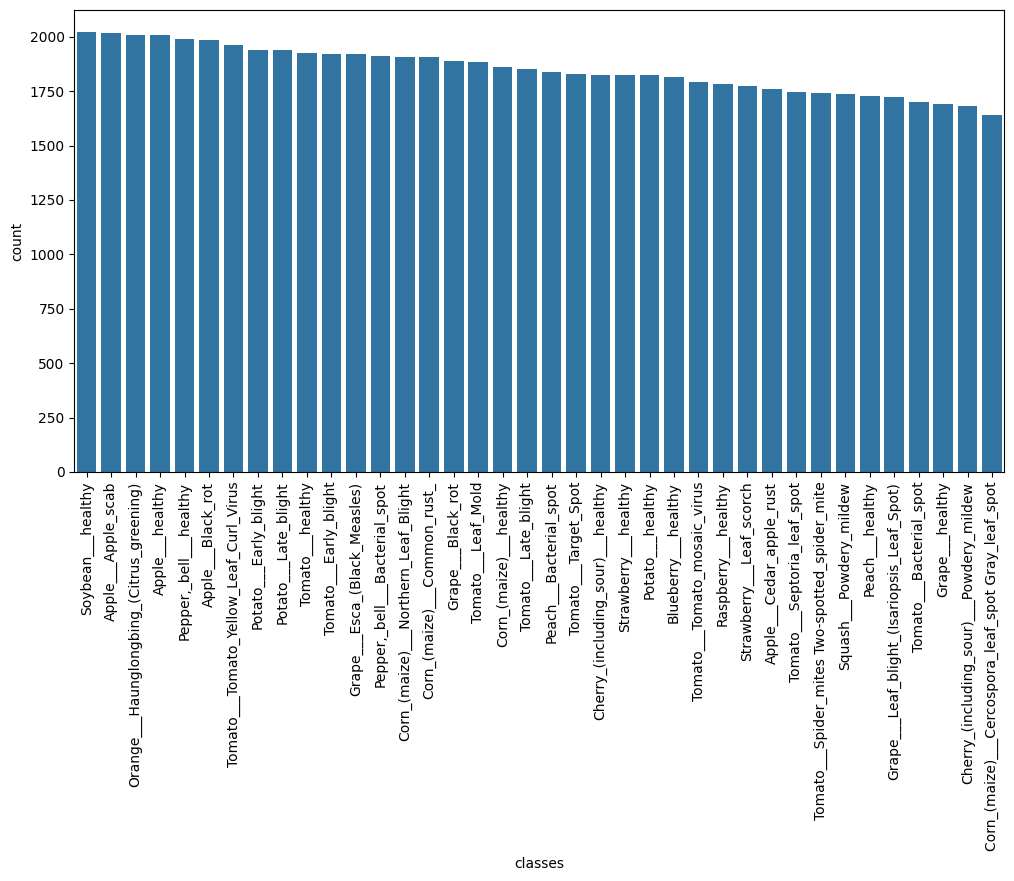

In [9]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(data=df, x="classes", order=df["classes"].value_counts().index)
plt.show()

In [10]:
# transformation -> problems

## Images number for training

In [11]:
classes_nums = pd.Series(classes)

n_images = 0
for count in classes_nums.value_counts():
    n_images += count

print(f"There are {n_images} images for training")

There are 38 images for training


In [12]:
def show_image(df, index):
    img_path = df.iloc[index]['images_paths']
    label = df.iloc[index]['classes']
    
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    plt.show()

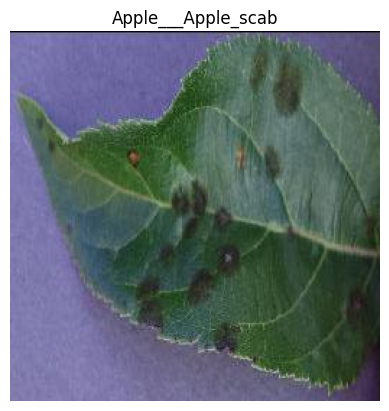

In [13]:
show_image(df, 3)

In [14]:
def show_images(df, sample_size=16, grid_shape=(4, 4), figsize=(12, 12)):
    sample_df = df.sample(sample_size)
    
    plt.figure(figsize=figsize)
    
    for i, (img_path, label) in enumerate(zip(sample_df['images_paths'], sample_df['classes'])):
        plt.subplot(grid_shape[0], grid_shape[1], i + 1)
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.title(label, fontsize=8)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

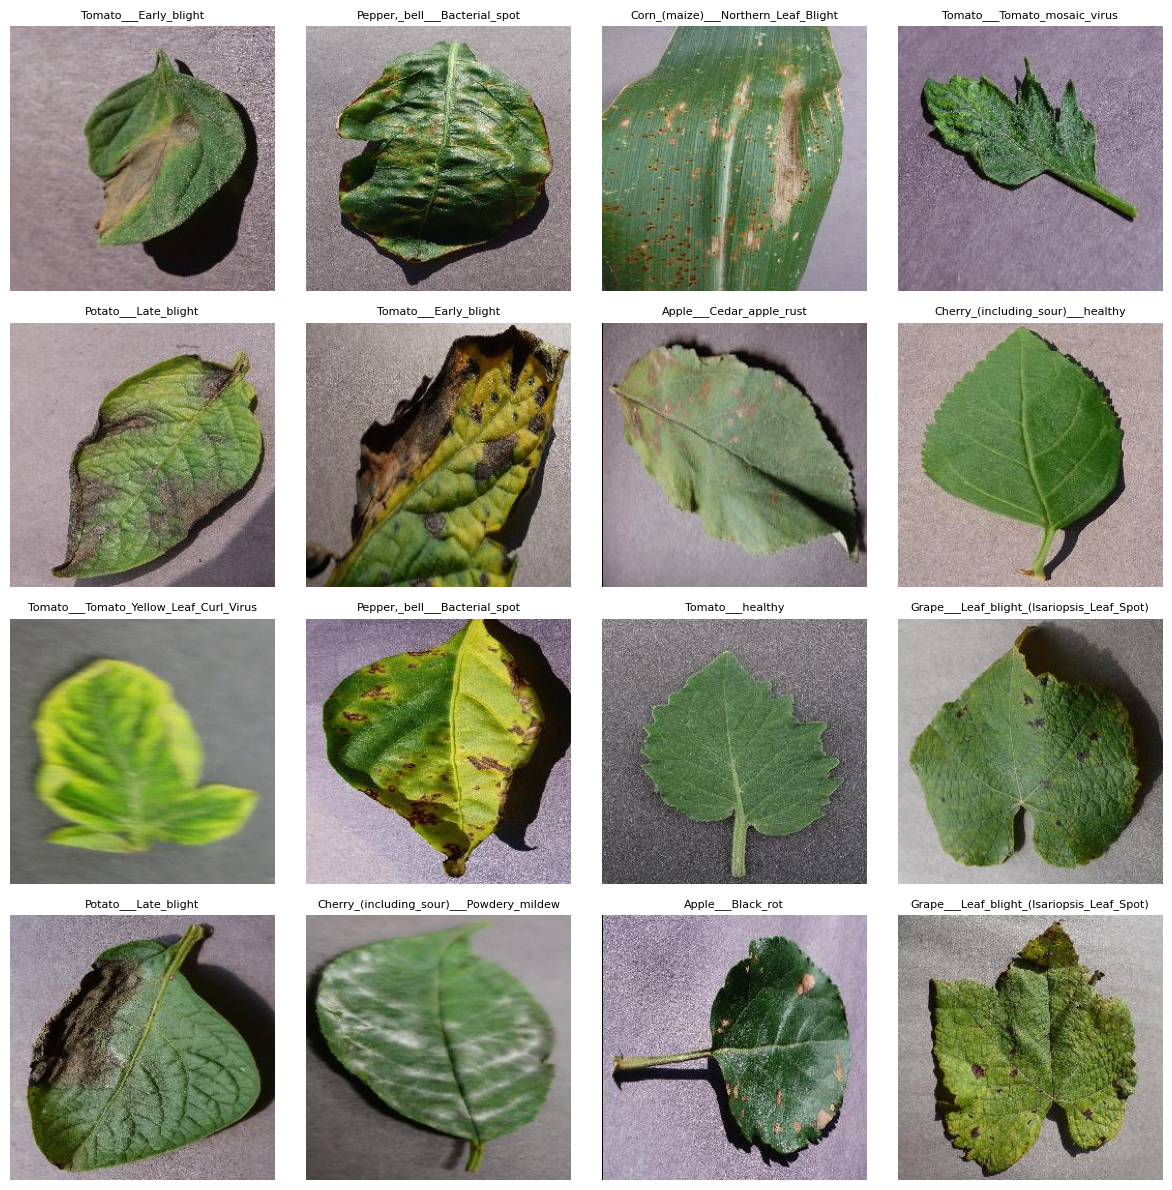

In [ ]:
show_images(df)

## Transformation

In [28]:
def show_images(df, sample_size=16, grid_shape=(4, 4), figsize=(12, 12)):
    max_images = grid_shape[0] * grid_shape[1]
    if sample_size > max_images:
        print(f"[Warning] Grid too small for {sample_size} images. Showing only {max_images} images.")
        sample_size = max_images

    sample_df = df.sample(sample_size)

    plt.figure(figsize=figsize)
    
    for i, (img_path, label) in enumerate(zip(sample_df['images_paths'], sample_df['classes'])):
            img = plt.imread(img_path)
            plt.subplot(grid_shape[0], grid_shape[1], i + 1)
            plt.imshow(img)
            plt.title(label, fontsize=8)
            plt.axis('off')

    plt.tight_layout()
    plt.show()


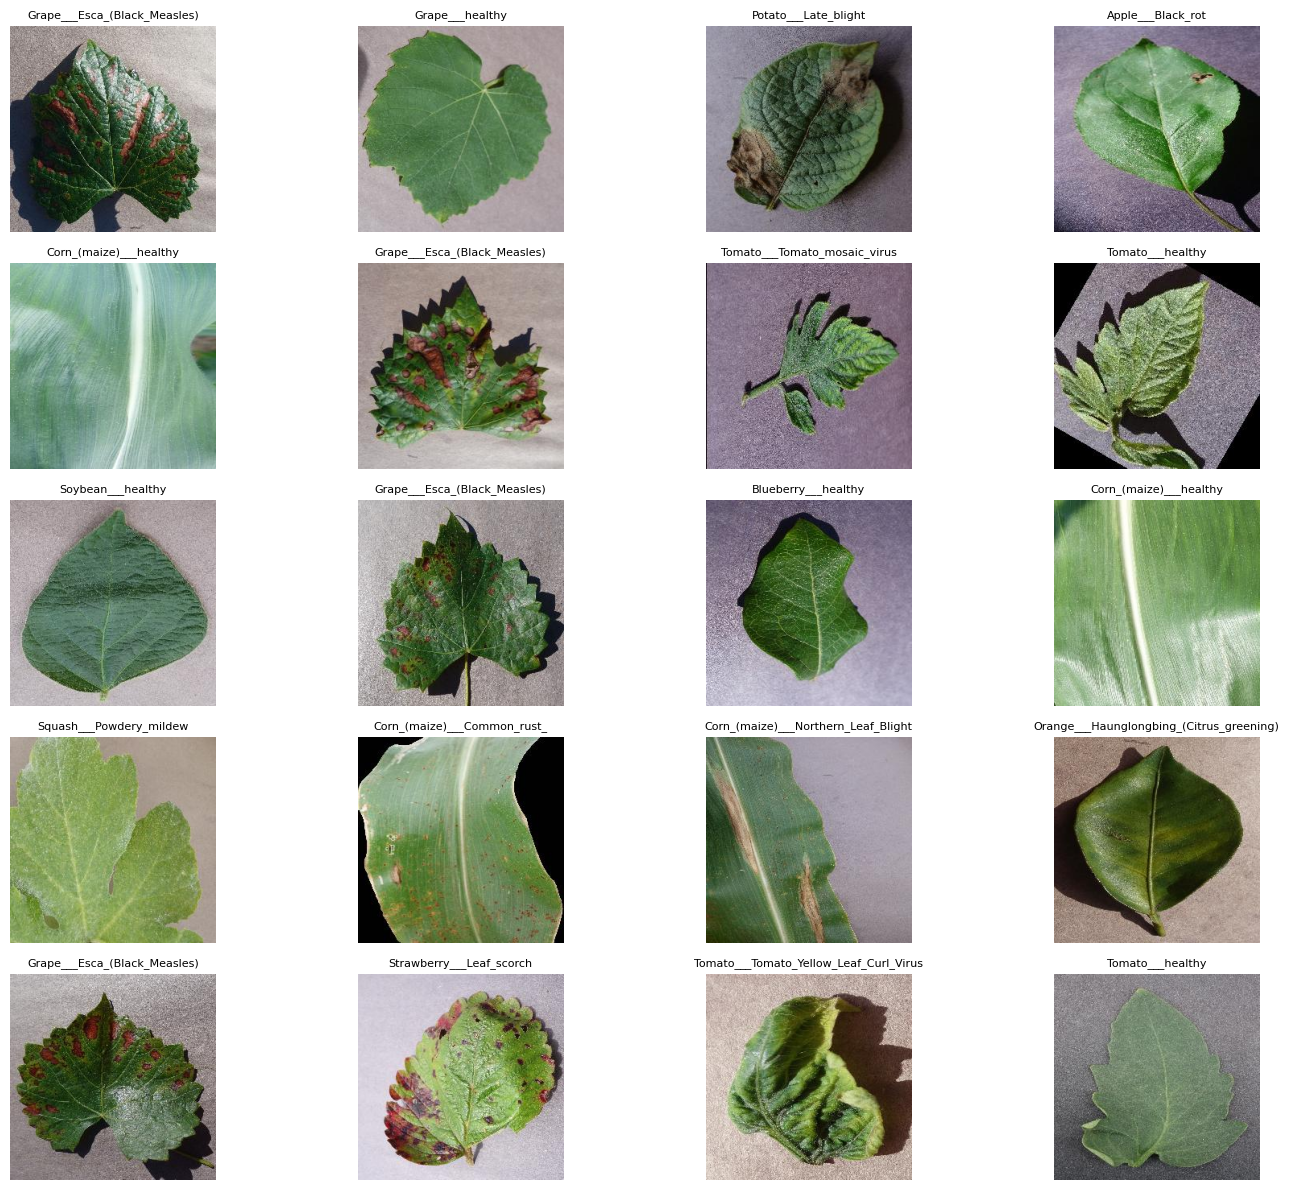

In [29]:
show_images(df, sample_size=20, grid_shape=(5, 4), figsize=(15, 12))